# Plotting data using pyspark

In this notebook, dat awill be retrieved and plotted using Pyspark.



In [2]:
!pip install pyspark==2.4.5

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 217.8 MB 13 kB/s /s eta 0:00:01█████                           | 34.4 MB 13.2 MB/s eta 0:00:14
     |████████████████████████████████| 197 kB 81.0 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257928 sha256=fc1e2dddba8d6c3f4840822a7ff758fca67a77ca3d218ab3bcb57b3adb8c1ca6
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/01/c0/03/1c241c9c482b647d4d99412a98a5c7f87472728ad41ae55e1e
Successfully built pyspark


In [3]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [4]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

Sampling is one of the most important things when it comes to visualization because often the data set gets so huge that you simply

The following function will return 10% sample of a given data frame:

In [ ]:
def getSample():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    #return df[['temeperatute','ts']].sample(frac = 0.1)
    return spark.sql("select temperature,ts from washing where temperature is not null order by ts asc").rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))

Now we want to create a histogram and boxplot. Please ignore the sampling for now and return a python list containing all temperature values from the data set

In [7]:
def getListForHistogramAndBoxPlot():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    my_list = spark.sql("""
        SELECT temperature from washing where temperature is not null
    """).rdd.map(lambda row: row.temperature).collect()
    if not type(my_list)==list:
        raise Exception('return type not a list')
    return my_list

Finally we want to create a run chart. Please return two lists (encapsulated in a python tuple object) containing temperature and timestamp (ts) ordered by timestamp.

In [8]:
#should return a tuple containing the two lists for timestamp and temperature
#please make sure you take only 10% of the data by sampling
#please also ensure that you sample in a way that the timestamp samples and temperature samples correspond (=> call sample on an object still containing both dimensions)
def getListsForRunChart():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    double_tuple_rdd = spark.sql("""
        select temperature,ts from washing where temperature is not null order by ts asc
    """).sample(False,0.1).rdd.map(lambda row : (row.ts,row.temperature))
    
    result_array_ts = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[0]).collect()
    result_array_temperature = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[1]).collect()
    return (result_array_ts,result_array_temperature)

Now it is time to grab a PARQUET file and create a dataframe out of it. Using SparkSQL you can handle it like a database. 

In [5]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2021-09-09 14:34:42--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/claimed/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2021-09-09 14:34:42--  https://github.com/IBM/claimed/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/claimed/raw/master/coursera_ds/washing.parquet [following]
--2021-09-09 14:34:42--  https://github.com/IBM/claimed/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/claimed/master/coursera_ds/washing.parquet [following]
--2021-09-09 14:34:42

In [6]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

Now we gonna test the functions you've completed and visualize the data.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

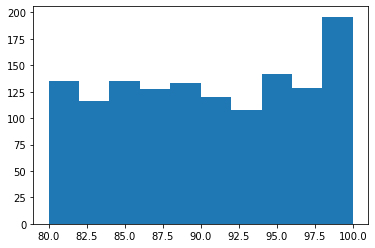

In [10]:
plt.hist(getListForHistogramAndBoxPlot())
plt.show()

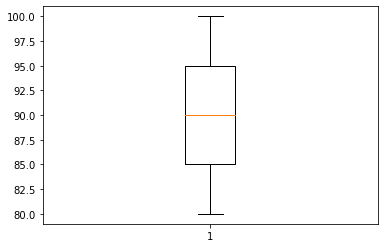

In [11]:
plt.boxplot(getListForHistogramAndBoxPlot())
plt.show()

In [12]:
lists = getListsForRunChart()

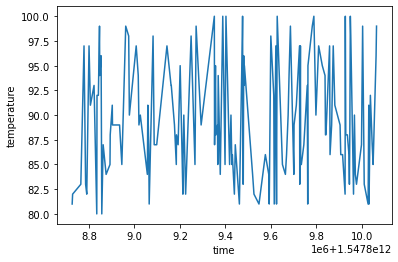

In [13]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()